In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import sigmoid, normalization, get_batch

In [42]:
def test(w, b, x, y):
    y_ = np.dot(w,x) + b
    a = sigmoid(y_)
    predict = np.where(a < 0.5, 0, 1)
    return 1 - np.mean(np.abs(predict - y), axis=1)
    

In [9]:
def generate_train_test(X, Y, path_to_save='data/'):
    '''
    根据原始数据集，按照0.9、0.1的比例划分为训练集和测试集。并将划分的数据保存到本地。
    @param:
        X:原始特征数据
        Y:原始标记数据
        path_to_save:数据保存路径
    '''
    train = [[],[]]
    test = [[],[]]
    
    for i in range(Y.shape[1]): 
        seed = np.random.randint(0,100)
        j = i + 1
        if seed < 90:
            train[0].append(X[:, i:j])
            train[1].append(Y[:, i:j])
        else:
            test[0].append(X[:, i:j])
            test[1].append(Y[:, i:j])
    
    train_x = np.hstack(train[0])
    train_y = np.hstack(train[1])

    test_x = np.hstack(test[0])
    test_y = np.hstack(test[1])

#     print(train_x.shape)
    np.save(path_to_save + 'train_x', train_x)
    np.save(path_to_save + 'train_y', train_y)
    np.save(path_to_save + 'test_x', test_x)
    np.save(path_to_save + 'test_y', test_y)
    print('data has been generated and saved under the path:', path_to_save)

In [21]:
def Z_Normalization(X):
    mean = np.mean(X, axis=1, keepdims=True)
    std = np.std(X, axis=1, keepdims=True)
    X = (X - mean) / ( std + 1e-8)
    return X

In [39]:
y_path = 'data/Y_train'
dfy = pd.read_csv(y_path, dtype=np.float32)

Y = dfy['label'].values
Y = np.reshape(Y, (1, Y.shape[0]))
dfy = None
print(Y.shape)

(1, 54256)


In [40]:
x_path = 'data/X_train'
dfx = pd.read_csv(x_path, dtype=np.float32)
X = dfx.iloc[:, 1:].values
X = X.T
dfx = None
X = Z_Normalization(X)
print(X.shape)

(510, 54256)


8086.4956

In [25]:
# 切分监督数据为训练集和测试集，并保存到本地
generate_train_test(X, Y)

data has been generated and saved under the path: data/


In [43]:
# 加载保存到本地的训练集和测试集数据

X = np.load('data/train_x.npy')
Y = np.load('data/train_y.npy')

Xt = np.load('data/test_x.npy')
Yt = np.load('data/test_y.npy')
print('the shape of X is', X.shape)
print('the shape of Y is', Y.shape)

the shape of X is (510, 48890)
the shape of Y is (1, 48890)


Training on 100 batch,loss is 0.449. train accury 0.836. test accury is 0.834
Training on 200 batch,loss is 0.293. train accury 0.875. test accury is 0.862
Training on 300 batch,loss is 0.436. train accury 0.906. test accury is 0.871
Training on 400 batch,loss is 0.258. train accury 0.883. test accury is 0.867
Training on 500 batch,loss is 0.207. train accury 0.922. test accury is 0.873
Training on 600 batch,loss is 0.294. train accury 0.898. test accury is 0.871
Training on 700 batch,loss is 0.387. train accury 0.852. test accury is 0.872
Training on 800 batch,loss is 0.242. train accury 0.914. test accury is 0.873
Training on 900 batch,loss is 0.220. train accury 0.898. test accury is 0.877
Training on 1000 batch,loss is 0.301. train accury 0.883. test accury is 0.876
Training on 1100 batch,loss is 0.266. train accury 0.883. test accury is 0.879
Training on 1200 batch,loss is 0.264. train accury 0.914. test accury is 0.879
Training on 1300 batch,loss is 0.287. train accury 0.875. tes

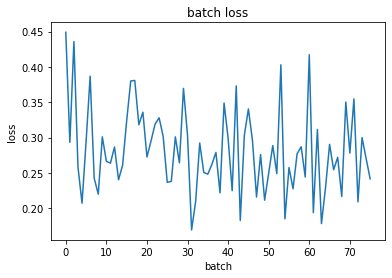

In [44]:
NODE = 1
INPUT_NODE = 510
# epsilon = 1e-9
TRAIN_STEP = 20
alpha = 0.25
A0 = alpha
BATCH_SIZE = 128
LEARNING_RATE_DECAY = 1
BETA = 0.9

# 初始化参数
w = np.random.rand(NODE, INPUT_NODE)
b = np.zeros((NODE,1))

#初始化初始动量
sdw = np.zeros((NODE,INPUT_NODE))
sdb = np.zeros((NODE,1))

losses = []

k = 1
for epoch in range(TRAIN_STEP):
    index = 0
    while True:
        x, y, index = get_batch(index, BATCH_SIZE, X, Y)
        if x is None:
            break
            
        y_ = np.dot(w,x) + b
        a = sigmoid(y_)
        m = y.shape[1]
        cross_entropy = (1 - y) * np.log(1 - a) + y * np.log(a)
        loss = -1 / m * np.sum(cross_entropy)
        
        dz = a - y
        dw = 1.0 / m * np.dot(dz, x.T)
        db = 1.0 / m * np.sum(dz)
        
        # Momentum
        sdw = BETA * sdw + (1-BETA) * dw
        sdb = BETA * sdb + (1-BETA) * db
        
        w = w - alpha * sdw
        b = b - alpha * db

        if k % 100 == 0:
            losses.append(loss)
            accury = test(w,b,Xt,Yt)
            train_accury = test(w, b, x, y)
            print('Training on %d batch,loss is %.3f. train accury %.3f. test accury is %.3f'\
                  %(k, loss,train_accury, accury))
        k += 1
    alpha = A0 / (1 + LEARNING_RATE_DECAY * epoch) 
    
plt.figure()
plt.plot(losses)
plt.title('batch loss')
plt.xlabel('batch')
plt.ylabel('loss')
plt.show()

In [34]:
# 加载最终预测集数据
path_test ='data/X_test'
dft = pd.read_csv(path_test, dtype=np.float32)
Xt = dft.iloc[:, 1:].values
Xt = Xt.T
dft = None
Xt = Z_Normalization(Xt)

In [35]:
# 使用训练模型预测数据
y_ = np.dot(w, Xt) + b
a = sigmoid(y_)
predict = np.where(a < 0.5, 0, 1)
print('prediction shape is ', predict.shape)

prediction shape is  (1, 27622)


In [36]:
# 保存结果到本地
index = [x for x in range(0, predict.shape[1])]
result = pd.DataFrame(predict.T, index=index, columns=['label'])
result.to_csv('data/result_z_score.csv')